### PROBLEMA 1 - Consider the equation x = 1 - exp(-c*x) [...]

Import the necessary libraries

In [1]:
from math import *
import numpy as np
from pylab import *
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

Alternative **a)** to single value of **c = 2**:

In [2]:
def func(c0, x1):
    return 1 - np.exp(-c0*x1)

x1 = 1
c0 = 2

accuracy = 1e-6
error = 100

while error > accuracy:
    x1, x2 = func(c0, x1), x1
    error = abs((x1 - x2)/(func(c0, x2)))
    
print(x1)

0.7968126311118457


Alternative **b)** for a range of values of **c between 0 e 3**:

In [3]:
list_cs = np.arange(0, 3, 0.01)
list_ys = []

accuracy = 1e-6

for c in range(len(list_cs)):
    x1 = 1
    error = 10
    
    while error > accuracy:
        x1, x2 = func(list_cs[c], x1), x1
        error = abs((x1 - x2))
        
    list_ys.append(x1)

Plot of the graph of **x versus c**:

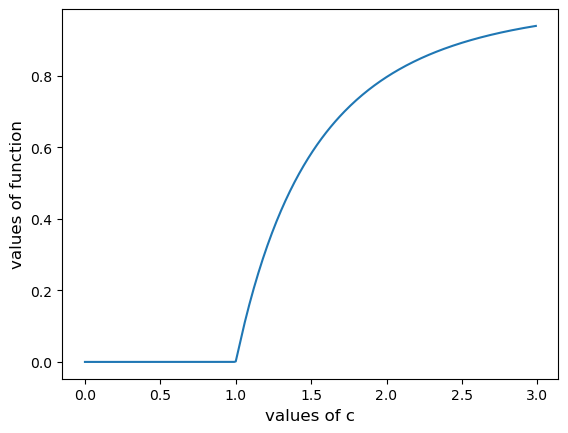

In [4]:
plt.plot(list_cs, list_ys)
plt.xlabel("values of c", size=12)
plt.ylabel("values of function", size=12)
show()

### PROBLEM 2 - The biochemical process of glucose [...]

Alternative **b)** First we have two equations

$$ -x+ay+x^{2}y = 0 \hspace{2cm} and \hspace{2cm} b-ay-x^{2}y = 0 \tag{1}$$ 

Isolating y in the two equations:

$$ x = y(a+x^{2}) \hspace{2cm} and \hspace{2cm} b = y(a+x^{2}) \tag{2}$$

Using the relaxation method, guessing a value to $y0 = 10$:

In [5]:


def func_x(a, x0, y0):
    return y0*(a+x0**2)
    
def func_y(a, b, x0):
    return b/(a+x0**2)
    
numbers = arange(0, 30, 1)
list_x, list_y = [], []

a, b = 1, 2
x0, y0 = b, 10

for i in range(len(numbers)):

    list_x.append(x0)
    list_y.append(y0)
    
    x1, y1 = func_x(a, x0, y0), func_y(a, b, x0)
    x0, y0 = x1, y1

print(f'{list_x} \n\n')
print(list_y)

[2, 50, 1000.4000000000001, 800.3207996801281, 1.2800032773755772, 8.238404827705814e-06, 0.7580327623449672, 3.149227337362941, 13.867062173790416, 35.40976628839989, 12.983769526339408, 0.2702762271798839, 0.012655503938507832, 1.8641458852940693, 8.948646532160994, 36.23577751334046, 32.41390066390958, 1.600663147921306, 0.0067742792806833926, 0.5614887681028795, 2.630418561242041, 12.041792171468886, 36.87407038150909, 18.639078323309068, 0.5121128711455564, 0.007245719734321341, 1.5845433160728801, 7.021186425544231, 28.65294569558615, 32.68546178571536] 


[10, 0.4, 0.0007996801279488205, 1.9983989626870535e-06, 3.1224903842190482e-06, 0.7580327622935186, 1.9999999998642575, 1.2701528251936183, 0.18318989404897654, 0.010346856997414802, 0.0015938140270319405, 0.011793963854402692, 1.8638473681820493, 1.9996797277355007, 0.4469233912745912, 0.02466752044219574, 0.0015220334447227546, 0.0019017535909405254, 0.5614630020829834, 1.9999082224922033, 1.5206007530207504, 0.2525538941991

We can see that results x and y dosn't converge to a value, so we need find a different way for the equations in **(2)**

$$ x = y(a+x^{2}) \hspace{1cm} \rightarrow \hspace{1cm} y = \frac{x}{a+x^{2}} \hspace{1cm}$$

$$ y = \frac{b}{a+x^{2}} \hspace{1cm} \rightarrow \hspace{1cm} x^{2} = \frac{b}{y} - a \hspace{1cm} \rightarrow \hspace{1cm} x = \sqrt{\frac{b}{y} - a}$$

In [6]:
def func_y(a, x0):
    return x0/(a+x0**2)
    
def func_x(a, b, y0):
    return np.sqrt(abs((b/y0) - a))

def derivada(x1, y1):
    return 2*x1*y1
    
a, b = 1, 2
x0, y0 = b, 10

accuracy = 1e-6
error = 10000

while error > accuracy:
    x1 = func_x(a, b, y0)
    y1 = func_y(a, x0)

    error = abs((x0 - x1)/(1-(1/derivada(x1, y1))))

    print(f'{x0}, {y0} erro: {error}')
    
    x0, y0 = x1, y1

2, 10 erro: 2.7810179996063695
0.8944271909999159, 0.4 erro: 2.2250087348953835
2.0, 0.4969039949999533 erro: 0.9270446661847174
1.7392303928748547, 0.4 erro: 0.6187429033321573
2.0, 0.43211526522242677 erro: 0.2768247659380562
1.9048345577136077, 0.4 erro: 0.24243108681671488
2.0, 0.41155404505562976 erro: 0.09734014312548253
1.9645938682117348, 0.4 erro: 0.09278366356427968
2.0, 0.40426827667701315 erro: 0.035706956844647454
1.9867586287628018, 0.4 erro: 0.03507859490530023
2.0, 0.40159174351156185 erro: 0.013283407738241281
1.9950393652166665, 0.4 erro: 0.013195657131410422
2.0, 0.40059566852578044 erro: 0.004966532049057761
1.9981404392825226, 0.4 erro: 0.004954223669036172
2.0, 0.4002232025413894 erro: 0.0018603892755358119
1.9993027595188866, 0.4 erro: 0.0018586600584434253
2.0, 0.40008367663224303 erro: 0.0006973569577992235
1.999738548124926, 0.4 erro: 0.0006971138733044969
2.0, 0.400031375318522 erro: 0.00026146825253613957
1.9999019574166363, 0.4 erro: 0.0002614340733432098
2

We can see that values of **x converge to 2.0** (equal to initial value) and the values of **y converge to 0.4**, how we wanted!

This solution agrees with the solution of the first alternative:

Alternative **a)** Simply isolatin $(a+x^{2})$ in the left equation in **(2)** and applying on the right:

$$ x = b \hspace{2cm} and \hspace{2cm} y = \frac{b}{a+b^{2}}$$

In [7]:
a, b = 1, 2

x, y = b, b/(a+b**2)

print(f'x: {x} and y: {y}')

x: 2 and y: 0.4


### PROBLEM 3 - Wien displacement constant

for simplicity denote $k_{B}$ to $k$

$$ I(\lambda) = \frac{2\pi hc\lambda^{-5}}{e^{\frac{hc}{\lambda kT}}-1}$$

Alternative **a)** The $\lambda$ that corresponds to the maximum value of $I(\lambda)$ is when $\frac{dI(\lambda)}{d\lambda} = 0$

Using the quotient rule and $x = hc/\lambda kT$ we have:

$$ \frac{-5p\lambda^{-6} (e^{x}-1) - p\lambda^{-5} (-\frac{hckT}{\lambda^{2}k^{2}T^{2}})e^{x}}{(e^{x}-1)^{2}} = 0$$

multiply by $(e^{x}-1)^{2}/p\lambda^{-5}$ :

$$ -5\lambda^{-1} (e^{x}-1) + (\frac{x}{\lambda})e^{x} = 0$$

distributing and multiply by $\lambda /e^{x}$ :

$$ -5 +\frac{5}{e^{x}} + x = 0$$

rearranging the terms and apply $x = hc/\lambda kT$, finally:

$$ 5e^{-hc/\lambda k_{B}T} + \frac{hc}{\lambda k_{B}T} - 5 = 0 \tag{3}$$

Alternative **b)** We need solve the equation **(3)**, so we use the Binary search method, for this we will denote two arbitrary points as guess:

In [10]:
def equation(x):
    return 5*np.exp(-x)+x-5

def recursive(x1, x2, f1, f2):

    accuracy = 1e-6
    
    if f1*f2 < 0:
        while (abs(x1-x2) > accuracy):
            midpoint = (x1+x2)/2
            f_mid = equation(midpoint)
            
            if f1*f_mid > 0:
                x1 = midpoint
            else:
                x2 = midpoint
                
        result = (x1+x2)/2
    else:
        if abs(x1-x2) > accuracy:
            x1, x2 = x1/2, x2/2
            recursive(x1, x2, f1, f2)
        else:
            result = (x1+x2)/2
    return result
    
x1, x2 = 4, 8
f1, f2 = equation(x1), equation(x2)

result = recursive(x1, x2, f1, f2)

print(f'x = {result}')

x = 4.965114116668701


Now we have the value of **x**, so will go calculate the Wien's constant:

$$ x = \frac{hc}{\lambda k_{B}T} \hspace{1cm} and \hspace{1cm} b = \lambda T, \hspace{1cm} so \hspace{1cm} b = \frac{hc}{xk_{B}} \tag{4}$$

In [12]:
h = 6.626e-34    # m2 Kg/ s
c = 3e+8         # m/s
kb = 1.38e-23    # m2 Kg/ s2 K
x = result

b = h*c/(x*kb)
print(f'b = {b:.8f} mK')

b = 0.00290111 mK


We needed multiply by 1000 for unit manipulation

Alternative **c)** Estimating the temperature of the sun using the second equation in **(4)**:

In [13]:
lamb = 502e-9
T = b/lamb

print(f'Temperature: {T:.0f} K')

Temperature: 5779 K
